# Multi word phrases #

Hypothesis: “Using multiple words together can drastically change the meaning of the individual words”

Reason: “We see many occurrences of multi-word phrases in both datasets. Our algorithms can detect their toxicity only if they can recognize multiple words as a single (typical) hateful phrase.” (Challenges for Toxic Comment Classification: An In-Depth Error Analysis, van Aken et al. 2018)

#### Examples ####

ID: 96
Label: True
Prediction: False
Confidence: 0.82492995
Comment: Das CDU-SPD-Regime in Dresden verschwindet wie ein Furz im Wind. 

ID: 350
Label: True
Prediction: False
Confidence: 0.5023966
Comment: MESSER-MOSLEMS, BEI IHREM AMOK-LAUF, HALTEN WEDER DUMME KUH, NOCH ESEL AUF! Traumjob der islamischen Invasoren: Halsabschneider äh Herrenfrisör, mal wird der verliebten Chefin u. Frisörmeisterin die Kehle gemessert, mal einem deutschen Mulatten.

ID: 661
Label: True
Prediction: False
Confidence: 0.50556785
Comment: Zwar hatte ich an eine ganz, ganz andere Aufteilung gedacht, West-Berlin und NRW sowie einige andere Teile der alten BRD für die anti-deutschen, anti-europäischen Multi-Kulti-Gender-Massenüberfremdungs-Fanatiker und ihre Goldstücke und die mitteldeutschen Bundesländer sowie Bayern und Schleswig-Holstein sowie die Hälfte von Baden Württemberg und Hessen für uns, die patriotischen Deutschen,

In [59]:
%run ../config.ipynb
%run ../lib/data_loader.ipynb
%run ../lib/helper_functions.ipynb
%run ../lib/diagram_generator.ipynb
%run ../lib/metrics_generator.ipynb
%run ../lib/table_generator.ipynb

data = load_data('../data/predictions.json')
import csv
import re

In [61]:
def all(c):
    return True
def find_regex_filter(regexp):
    def f(element):
        return regexp.search(element['text'])
    return f
def numberOfPUNCTs(s, e):
    def f(el):
        n = 0
        for token in el['tokens']:
            if token.pos_ == 'PUNCT':
                n += 1
        return n >= s and n<e
    return f
    
def find_filter(contains):
    def f(element):
        return element['text'].lower().find(contains) > 0
    return f


In [62]:
#show_data(find_regex_filter(re.compile('\w\-\w')))

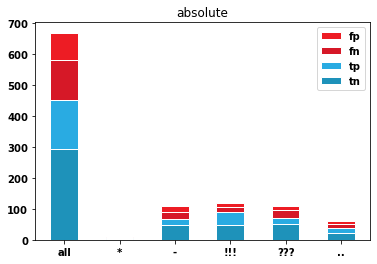

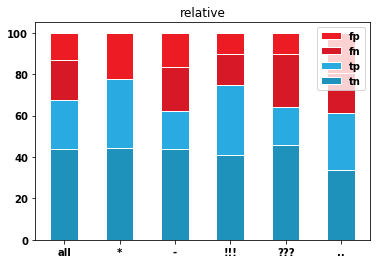

In [63]:
diagram_filters = []
diagram_filters.append(('all', all))
diagram_filters.append(('*',find_regex_filter(re.compile('.[\*]'))))
diagram_filters.append(('-',find_regex_filter(re.compile('\w\-\w'))))
diagram_filters.append(('!!!',find_regex_filter(re.compile(r'.[\!]'))))
diagram_filters.append(('???',find_regex_filter(re.compile(r'\?'))))
diagram_filters.append(('..',find_regex_filter(re.compile(r'.\.\.'))))
#diagram_filters.append(('0-5',numberOfPUNCTs(0,5)))
#diagram_filters.append(('5-10',numberOfPUNCTs(5,10)))
#diagram_filters.append(('10-15',numberOfPUNCTs(10,15)))
#diagram_filters.append(('>15',numberOfPUNCTs(15,2000)))

#name, filters, relative
create_plt(name = "absolute", filters = diagram_filters, relative = False)
create_plt(name = "relative", filters = diagram_filters, relative = True)

In [64]:
print('all')
show_metrics(calc_metrics())

all


,label hate (287),label nohate (383)
pred hate (245),157,88
pred nohate (425),130,295


accuracy,precision,recall,f1_score
0.6746268656716418,0.6408163265306123,0.5470383275261324,0.5902255639097745


In [65]:
print('contains "-"')
show_metrics(calc_metrics(diagram_filters[2][1]))

contains "-"


,label hate (43),label nohate (66)
pred hate (38),20,18
pred nohate (71),23,48


accuracy,precision,recall,f1_score
0.6238532110091743,0.5263157894736842,0.46511627906976744,0.49382716049382713


In [66]:
print('contains "-" difference')
show_metrics(calc_metric_difference(calc_metrics(diagram_filters[2][1])))

contains "-" difference


,label hate (287),label nohate (383)
pred hate (250),180,70
pred nohate (420),107,313


accuracy,precision,recall,f1_score
0.735820895522388,0.72,0.627177700348432,0.6703910614525139
